In [1]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [48]:
df.shape

(4340, 8)

In [49]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Print Unique values for Categorical features

In [50]:
print("Fuel categories: ",df.fuel.unique())
print("Seller type categories: ",df.seller_type.unique())
print("Transmission categories: ",df.transmission.unique())
print("Owner categories: ",df.owner.unique())

Fuel categories:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller type categories:  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission categories:  ['Manual' 'Automatic']
Owner categories:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


#### Check missing values

In [51]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [52]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [53]:
import datetime
now = datetime.datetime.now()

In [54]:
df['car_age']=now.year-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [55]:
df.drop(['year','name'], axis=1, inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [56]:
df_processed=pd.get_dummies(df,drop_first=True)

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

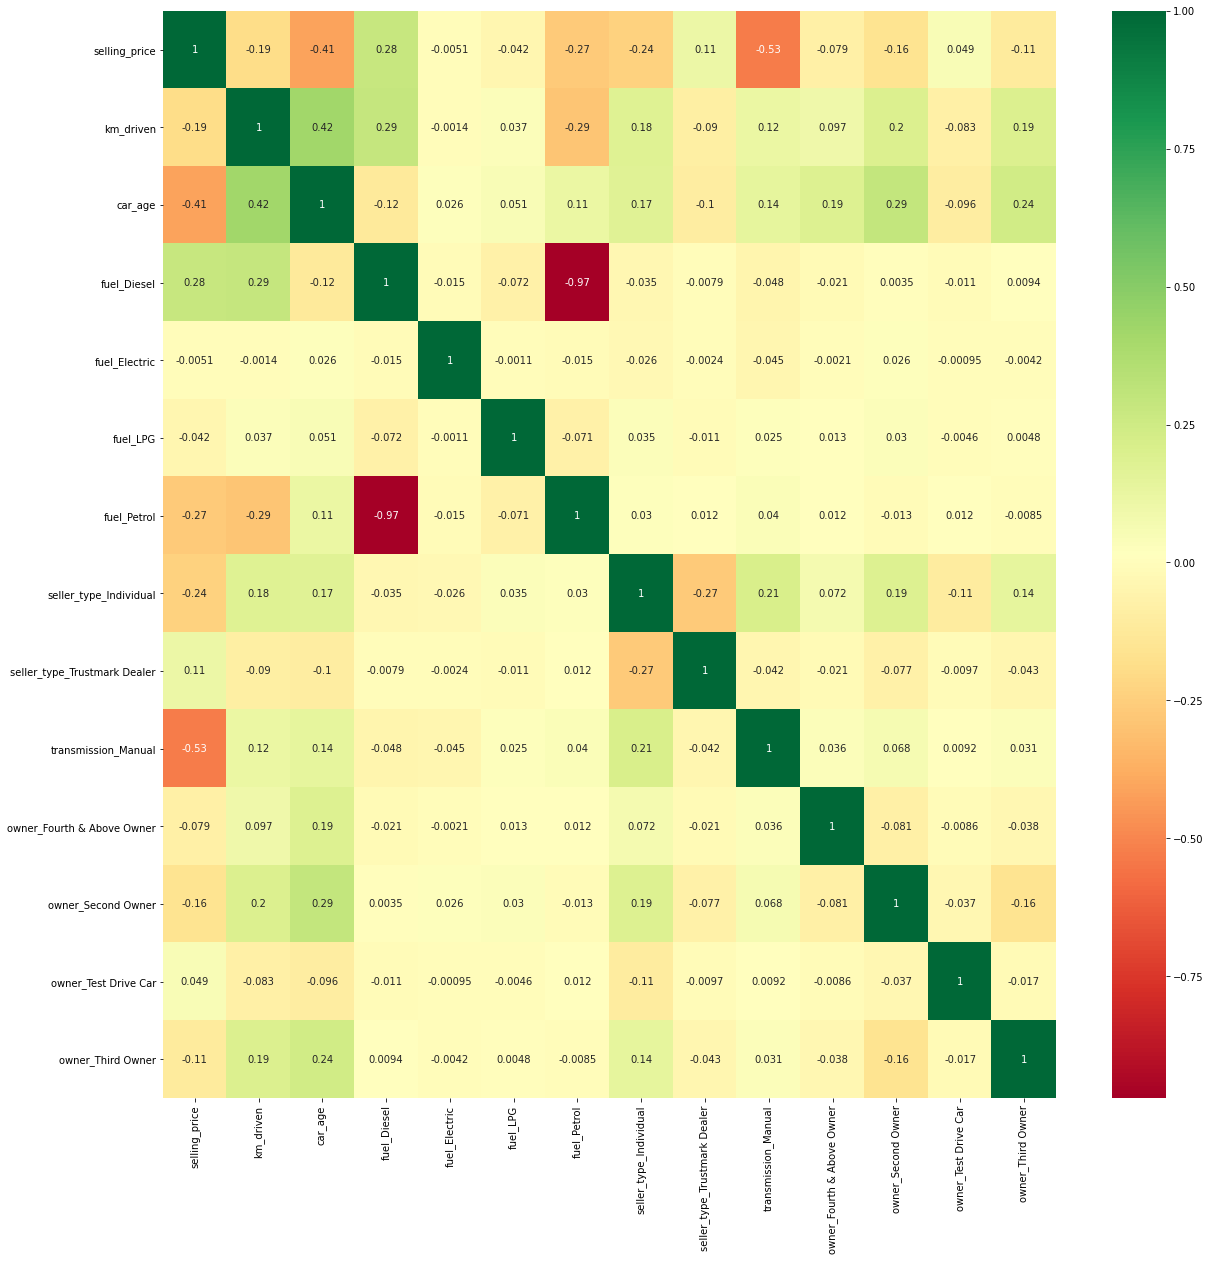

In [58]:
corr_mat = df_processed.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_processed[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [59]:
df_processed.corr().index

Index(['selling_price', 'km_driven', 'car_age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [60]:
X=df_processed.drop(['selling_price'], axis=1)
y=df_processed.selling_price

In [61]:
X.head()

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [62]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
def finding_best_model1(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1,2,5,10],
                'criterion' : ['mse','friedman_mse']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        #gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        rf_random = RandomizedSearchCV(estimator = config['model'], param_distributions = config['params'],
                               scoring='neg_mean_squared_error', n_iter = 10, cv = cv, 
                               random_state=0, n_jobs = 1)
        rf_random.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': rf_random.best_score_,
            'best_params': rf_random.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

df_scores = finding_best_model1(X_train,y_train)

/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [25]:
df_scores

,model,best_score,best_params
0,linear_regression,-2.164853e+11,{'normalize': True}
1,lasso,-2.164853e+11,"{'selection': 'random', 'alpha': 1}"
2,decision_tree,-1.793065e+11,"{'splitter': 'random', 'criterion': 'friedman_..."
3,random_forest,-1.434887e+11,"{'n_estimators': 900, 'min_samples_split': 10,..."


In [26]:
df_scores.loc[3][2]

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'mse'}

In [64]:
random_forest=RandomForestRegressor(n_estimators= 900,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 30,
 criterion= 'mse')
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(random_forest, X_train, y_train, cv=cv)

array([0.79597706, 0.64744282, 0.58624457, 0.50104168, 0.57245049])

In [65]:
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=900)

In [66]:
random_forest.score(X_test, y_test)

0.6023189612744277

In [67]:
y_pred = random_forest.predict(X_test)

/home/navjot/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

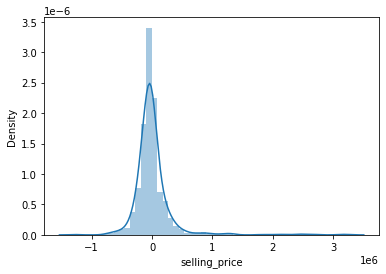

In [68]:
sns.distplot(y_test-y_pred)

#### Feature Importance

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_)

[2.48961685e-01 2.45031268e-01 1.29911641e-01 2.19373123e-05
 2.48851308e-05 2.05923890e-04 4.60029081e-02 8.18416854e-03
 2.92832661e-01 8.98746297e-04 2.26032599e-02 6.80669264e-04
 4.64024625e-03]


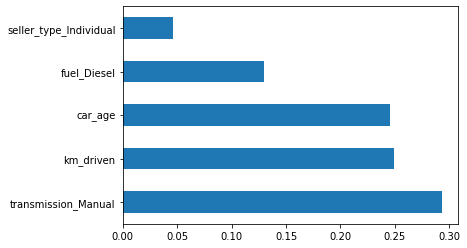

In [71]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [72]:
X=X[['transmission_Manual', 'car_age', 'km_driven', 'fuel_Diesel', 'seller_type_Individual']]

In [88]:
X.head()

,transmission_Manual,car_age,km_driven,fuel_Diesel,seller_type_Individual
0,1,14,70000,0,1
1,1,14,50000,0,1
2,1,9,100000,1,1
3,1,4,46000,0,1
4,1,7,141000,1,1


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [80]:
df_scores = finding_best_model1(X_train,y_train)

/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/navjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [81]:
df_scores

,model,best_score,best_params
0,linear_regression,-2.164853e+11,{'normalize': True}
1,lasso,-2.164854e+11,"{'selection': 'cyclic', 'alpha': 1}"
2,decision_tree,-1.886533e+11,"{'splitter': 'random', 'criterion': 'friedman_..."
3,random_forest,-1.432950e+11,"{'n_estimators': 900, 'min_samples_split': 10,..."


In [118]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
#Criterion
criterion = ['mse','friedman_mse']

In [119]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'criterion': ['mse', 'friedman_mse']}


In [120]:
# First create the base model to tune
rf = RandomForestRegressor()

In [121]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [122]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, criterion=mse, total=   1.9s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=friedman_mse 
[CV]  n_estimators=300, min_sampl

[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, criterion=friedman_mse, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, criterion=friedman_mse 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, criterion=friedman_mse, total=   2.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse, total=   2.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse, total=   2.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'friedman_mse'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [123]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'mse'}

In [127]:
random_forest=RandomForestRegressor(n_estimators= 900,
 min_samples_split= 5,
 min_samples_leaf= 5,
 max_features= 'sqrt',
 max_depth= 10,
 criterion= 'mse')
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(random_forest, X_train, y_train, cv=cv)

array([0.80224791, 0.64251707, 0.58871366, 0.49707077, 0.57619061])

In [128]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=900)

In [129]:
random_forest.score(X_test, y_test)

0.6082633545366424

/home/navjot/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

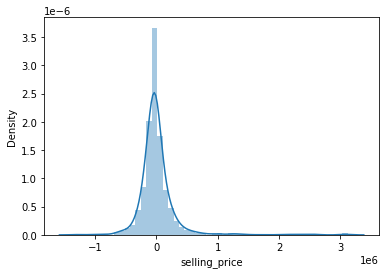

In [137]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

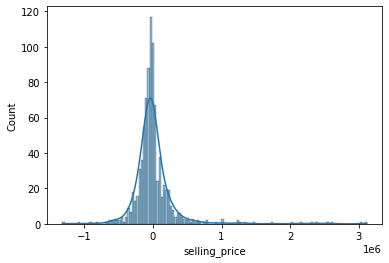

In [140]:
sns.histplot(y_test - y_pred,kde = True)

**Thus with fewer parameters also we are able to achieve the similar accuracy**

In [142]:
import pickle
file = open('car_price_pred_rf.pkl','wb')
pickle.dump(random_forest,file)

In [143]:
X_test.head()

,transmission_Manual,car_age,km_driven,fuel_Diesel,seller_type_Individual
1234,1,4,30300,0,1
3327,1,5,25000,0,1
1563,1,11,50000,0,1
2364,1,3,22000,0,1
2487,1,7,25000,0,1
